# Your first embedding

## Exercise objectives:
- Run your first RNN for NLP
- Get a first taste of what an embedding is

<hr>
<hr>

Words are not something you can easily feed to a Neural Network. For this reason, we have to convert them to something more meaningful. 

And this is exactly what _Embeddings_ are for! They map any word onto a vectorial representation (this is a fancy way in which  each word corresponds to a vector ;) ). For instance, the word `dog` can be represented by the vector $(w_1, w_2, ..., w_n)$ in the embedding space, and we will learn the weights $(w_k)_k$.

So let's just do it.


# The data


❓ **Question** ❓ Let's first load the data. You don't have to understand what is going on in the function, it does not matter here.

⚠️ **Warning** ⚠️ The `load_data` function has a `percentage_of_sentences` argument. Depending on your computer, there are chances that a too large number of sentences will make your compute slow down, or even freeze - your RAM can even overflow. For that reason, **you should start with 10% of the sentences** and see if your computer handles it. Otherwise, rerun with a lower number. 

⚠️ **DISCLAIMER** ⚠️ **No need to play _who has the biggest_ (RAM) !** The idea is to get to run your models quickly to prototype. Even in real life, it is recommended that you start with a subset of your data to loop and debug quickly. So increase the number only if you are into getting the best accuracy. 

In [1]:
###########################################
### Just run this cell to load the data ###
###########################################

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)
    
    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)
        
        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]
  
        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]
    
    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=20)

2022-05-17 21:16:14.819550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-17 21:16:14.819638: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /home/matheus/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


2022-05-17 21:17:47.940907: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-17 21:17:47.940970: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-17 21:17:47.940997: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-O26C6N05): /proc/driver/nvidia/version does not exist
2022-05-17 21:17:47.943005: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Now that you have loaded the data, let's look what is inside !

❓ **Question** ❓ You can play with the data here. In particular, `X_train` and `X_test` are lists of sentences. Let's print some of them, with their respective label stored in `y_train` and `y_test`.

In [6]:
' '.join(X_train[2]), y_train[2]

('mann photographs the alberta rocky mountains in a superb fashion and jimmy stewart and walter brennan give enjoyable performances as they always seem to do br br but come on hollywood a mountie telling the people of dawson city yukon to elect themselves a marshal yes a marshal and to enforce the law themselves then gunfighters battling it out on the streets for control of the town br br nothing even remotely resembling that happened on the canadian side of the border during the klondike gold rush mr mann and company appear to have mistaken dawson city for deadwood the canadian north for the american wild west br br canadian viewers be prepared for a reefer madness type of enjoyable howl with this ludicrous plot or to shake your head in disgust',
 0)

In [7]:
' '.join(X_train[19]), y_train[19]

("nathan detroit runs illegal craps games for high rollers in nyc but the heat is on and he can't find a secure location he bets chronic gambler sky masterson that sky can't make a prim missionary sarah brown go out to dinner with him sky takes up the challenge but both men have some surprises in store \x85 br br this is one of those expensive fifties mgm musicals in splashy colour with big sets loud music larger than life roles and performances to match broadway photographed for the big screen if you like that sort of thing which i don't my main problem with these type of movies is simply the music i like all kinds of music from albinoni to zz top but broadway show tunes in swing time with never ending pah pah tah dah trumpet flourishes at the end of every fourth bar aren't my cup of tea this was written by the tag team of frank loesser mankiewicz jo swerling and abe burrows based on a couple of damon runyon stories and while the plot is quite affable the songs are weak blaine's two n

**LABELS**, the task corresponds to a binary classification problem:
- label 0 corresponds to a negative movie review
- label 1 corresponds to a positive movie review

**INPUTS** : The data have been partially cleaned ! So you don't have to worry about it in this exercise. But don't forget this step in real-life challenges. 

Remember that words are not computer-compatible materials? You have to tokenize them!

❓ **Question** ❓ Run the following cell to tokenize your sentences

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionnary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set !
# This tokenization also lower your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)
    
# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

❓ **Question** ❓ Print some of the tokenized sentences to be sure you got what you expected

In [9]:
X_train_token[19]

[9033,
 7668,
 1214,
 5563,
 18384,
 1701,
 15,
 288,
 14898,
 8,
 4609,
 18,
 1,
 5277,
 6,
 20,
 2,
 27,
 174,
 154,
 3,
 7669,
 2026,
 27,
 9946,
 9947,
 11111,
 1264,
 6653,
 12,
 1264,
 174,
 96,
 3,
 18385,
 11112,
 2836,
 1783,
 132,
 41,
 5,
 3095,
 16,
 88,
 1264,
 296,
 53,
 1,
 2583,
 18,
 201,
 322,
 25,
 47,
 2429,
 8,
 996,
 3557,
 7,
 7,
 11,
 6,
 28,
 4,
 150,
 3694,
 5042,
 2535,
 3096,
 8,
 18386,
 3265,
 16,
 199,
 678,
 1415,
 211,
 2761,
 71,
 106,
 570,
 2,
 367,
 5,
 882,
 2263,
 3558,
 15,
 1,
 199,
 273,
 42,
 23,
 35,
 12,
 430,
 4,
 145,
 60,
 10,
 90,
 54,
 294,
 420,
 16,
 131,
 509,
 4,
 98,
 6,
 345,
 1,
 211,
 10,
 35,
 29,
 3097,
 4,
 211,
 37,
 24470,
 5,
 24471,
 328,
 18,
 2263,
 121,
 3559,
 8,
 4109,
 55,
 16,
 116,
 265,
 14899,
 14899,
 24472,
 14900,
 9034,
 11113,
 30,
 1,
 125,
 4,
 159,
 2830,
 1277,
 612,
 54,
 4426,
 4,
 3451,
 11,
 13,
 416,
 31,
 1,
 3821,
 784,
 4,
 1115,
 24473,
 18387,
 4807,
 24474,
 2,
 11114,
 9035,
 407,
 20,
 3,
 

The dictionary that maps each word to a token can be accessed with `tokenizer.word_index`
    
❓ **Question** ❓ Add a `vocab_size` variable that stores the number of different words (=tokens) in the train set. This is called the _size of the vocabulary_.

In [13]:
vocab_size = len(tokenizer.word_index)
vocab_size

42660

Your `X_train_token` and `X_test_token` contain sequences of different lengths.

<img src="padding.png" alt='Word2Vec' width="700px" />

However, a neural network has to have a tensor as input. For this reason, you have to pad your data.

❓ **Question** ❓  Pad your data with the `pad_sequences` function (documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)). Do not forget about the `dtype` and `padding` keywords (but do not use `maxlen` here).

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

# The RNN

Let's now feed this data to a Recurrent Neural Network.

❓ **Question** ❓ Write a model that has:
- an embedding layer whose `input_dim` is the size of your vocabulary (= your `vocab_size`), and whose `output_dim` is the size of the embedding space you want to have
- a RNN (SimpleRNN, LSTM, GRU) layer
- a Dense layer
- an output layer

⚠️ **Warning** ⚠️ Here, you don't need a masking layer. Why? Because `layers.Embedding` has a argument to do that directly, which you have to set with `mask_zero=True`. That also means that your data **HAVE TO** be padded with **0** (which is the default behavior). See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2) to understand how it **impacts** the `input_dim`.

<details>
    <summary>💡 Hint</summary>

`input_dim` should equal size of vocabulary + 1

</details>

Compile it with the appropriate arguments

In [17]:
from tensorflow.keras import Sequential, layers

In [18]:
model = Sequential()

model.add(layers.Embedding(input_dim=vocab_size+1, output_dim=50, mask_zero=True))
model.add(layers.LSTM(20))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

❓ **Question** ❓ Look at the number of parameters in your RNN. 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          2133050   
                                                                 
 lstm (LSTM)                 (None, 20)                5680      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,138,951
Trainable params: 2,138,951
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ Check that the number of parameters in your embedding layer is equal to the number of words in your vocabulary, times the dimension of your embedding.

In [20]:
vocab_size*50

2133000

❓ **Question** ❓ Start fitting your model with 20 epochs, with an early stopping criterion whose patience is equal to 4.

⚠️ **Warning** ⚠️ You might see that it takes a lof ot time! 

**So stop it after a couple of iterations!**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
es = EarlyStopping(patience=4, restore_best_weights=True)

model.fit(X_train_pad, y_train, epochs=20, validation_split=0.3, batch_size=32, callbacks=[es])

Epoch 1/20
 20/110 [====>.........................] - ETA: 4:13 - loss: 0.6925 - accuracy: 0.4938

KeyboardInterrupt: 

Let's not waste too much time just staring at our screen or taking coffees. It is too early to start having breaks ;)

❓ **Question** ❓ We will reduce the computational time. To start, let's first look at how many words there are in the different sentences of your train set (Just run the following cell).

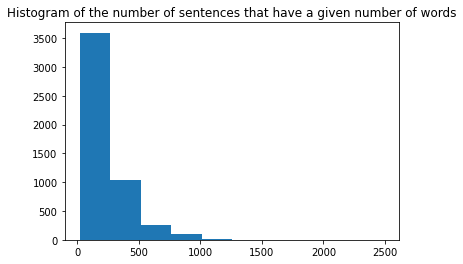

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()
    
plot_hist(X_train)


You will probably see that 90 to 95% of your sentences have less than 300 words. And very few have more than 1000.

However, as you didn't use `maxlen` in your padding above, your input tensor has a dimension equal to the length of the sentence that has the maximum number of words.

Now, let's look at how it affects the padding : 


<img src="tensor_size.png" alt='Word2Vec' width="700px" />

Because of a very few number of sentences, one dimension of your tensor is equal to something like 1000. And most of the sentences that have 200 words have just padded values that are useless.

So your tensor is mostly useless information. But which still takes time to train.

But what if you pad the data to a maximum length (`maxlen`) of say 200 (words)?
- First, that would increase the convergence and you would not need to stare at your screen while waiting for the algorithm to converge
- But in essence, do you really lose that much information? Do you think that you often need more than 200 words (up to 1000) to tell wheter or not a sentence is positive of negative?

❓ **Question** ❓ For all these reasons, come back to your padding and use the `maxlen` keywords and rerun the model !  See how faster it goes now - without hurting the performances ;)

In [29]:
X_train_pad[0].shape

(2493,)

In [30]:
X_train_pad2 = pad_sequences(X_train_token, maxlen=200, dtype='float32', padding='post')
X_test_pad2 = pad_sequences(X_test_token, maxlen=200, dtype='float32', padding='post')

In [31]:
X_train_pad2[0].shape

(200,)

In [32]:
model2 = Sequential()

model2.add(layers.Embedding(input_dim=vocab_size+1, output_dim=50, mask_zero=True))
model2.add(layers.LSTM(20))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
model2.fit(X_train_pad2, y_train, epochs=20, validation_split=0.3, batch_size=64, callbacks=[es])

Epoch 1/20
55/55 [==============================] - 20s 273ms/step - loss: 0.6596 - accuracy: 0.6271 - val_loss: 0.7204 - val_accuracy: 0.6553
Epoch 2/20
55/55 [==============================] - 14s 254ms/step - loss: 0.4198 - accuracy: 0.8426 - val_loss: 0.4162 - val_accuracy: 0.8287
Epoch 3/20
55/55 [==============================] - 13s 243ms/step - loss: 0.2175 - accuracy: 0.9300 - val_loss: 0.3702 - val_accuracy: 0.8373
Epoch 4/20
55/55 [==============================] - 14s 247ms/step - loss: 0.1205 - accuracy: 0.9629 - val_loss: 0.4266 - val_accuracy: 0.8340
Epoch 5/20
55/55 [==============================] - 14s 252ms/step - loss: 0.0559 - accuracy: 0.9851 - val_loss: 0.5078 - val_accuracy: 0.8320
Epoch 6/20
55/55 [==============================] - 14s 246ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.5594 - val_accuracy: 0.8353
Epoch 7/20
55/55 [==============================] - 14s 256ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.6583 - val_accuracy: 0.8313

In [35]:
model2.evaluate(X_test_pad2, y_test)

157/157 [==============================] - 7s 44ms/step - loss: 0.3571 - accuracy: 0.8476


[0.35711637139320374, 0.847599983215332]